# Logistic Regression from Scratch

## Simple 3-Dimensional Data for Easy Visualization

#### Author: Victor Nascimento Ribeiro - January 2024

For a detailed explanation of the functions, please refer to the `logistic_regression.py` file.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from logistic_regression import logistic_regression

### Plotting function

In [2]:
def show_3d(X, w=None, plane=False, title='None'):
    # plot points
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    ax.scatter3D(X[:,0], X[:,1], X[:,2], s=50, c=color, alpha=0.8)
    
    # plot plane
    if w is not None:
        x_values = np.linspace(-11, 11, N)
        y_values = np.linspace(-11, 11, N)
        x, y = np.meshgrid(x_values, y_values) 
        z = (-w[0] - w[1]*x - w[2]*y) / w[3] # w0 + w1x + w2y + w3z = 0
        #Z = 3*np.sin(x) + 3*np.cos(Y)
        ax.plot_surface(x, y, z, color='g')
    ax.view_init(elev=10, azim=-60) 
    plt.show()

## Creating a random non-linearly separable training set - 3D
#### Similarly as in the 3D case

- Our training set consist in N radom points in $(x_1,x_2,x_3) \in [-10, 10] \times [-10, 10] \subseteq R^3$ region

- Let us fix a function $f(x_1,x_2) = 3sin(x_1) + 3cos(x_2)\;$

- let's decide which class each point belongs to using $f(x_1,x_2)$: </br > 
  - if $x_3 > f(x_1,x_2)$ then the point is above $f$, so it belongs to <font color="blue">blues</font>
  - otherwise the point is below $f$, so it belongs to <font color="red">reds</font>
  

In [3]:
# creating a random data
N = 100 # number of points

x1 = np.random.randint(-10,10,N)
x2 = np.random.randint(-10,10,N)
x3 = np.random.randint(-10,10,N)

X = np.column_stack((x1, x2, x3))
y = np.zeros(N)

# assign colors
color = np.where(x3 > 3*np.sin(x1) + 3*np.cos(x2), 'b', 'r')
y = np.where(color == 'b', 1, 0)

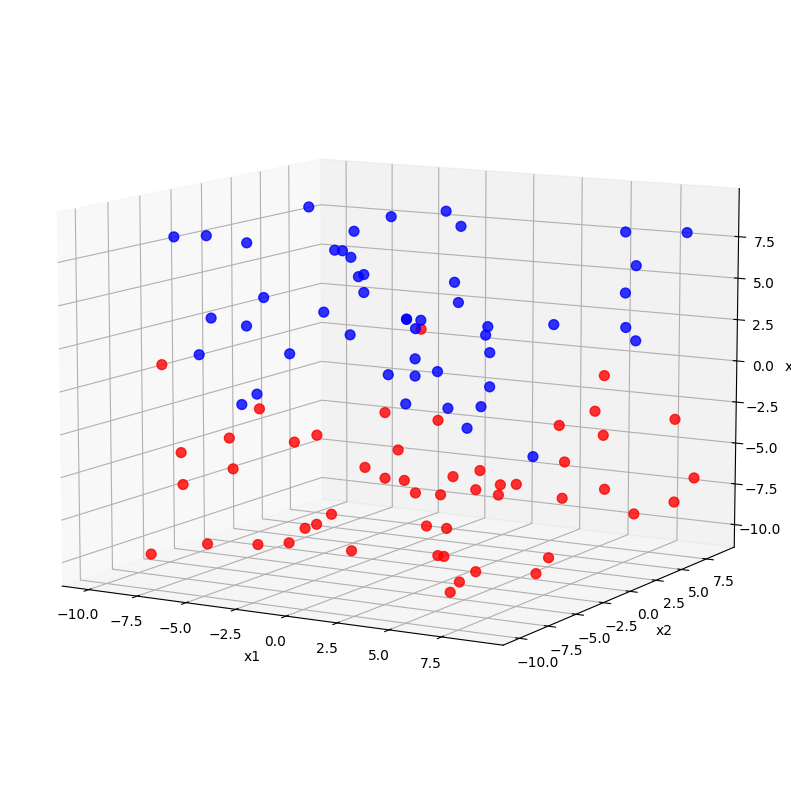

In [4]:
show_3d(X, title='Dataset')

# Training

In [5]:
model = logistic_regression()

In [6]:
model.fit(X, y, lr=0.002, epochs=5000)

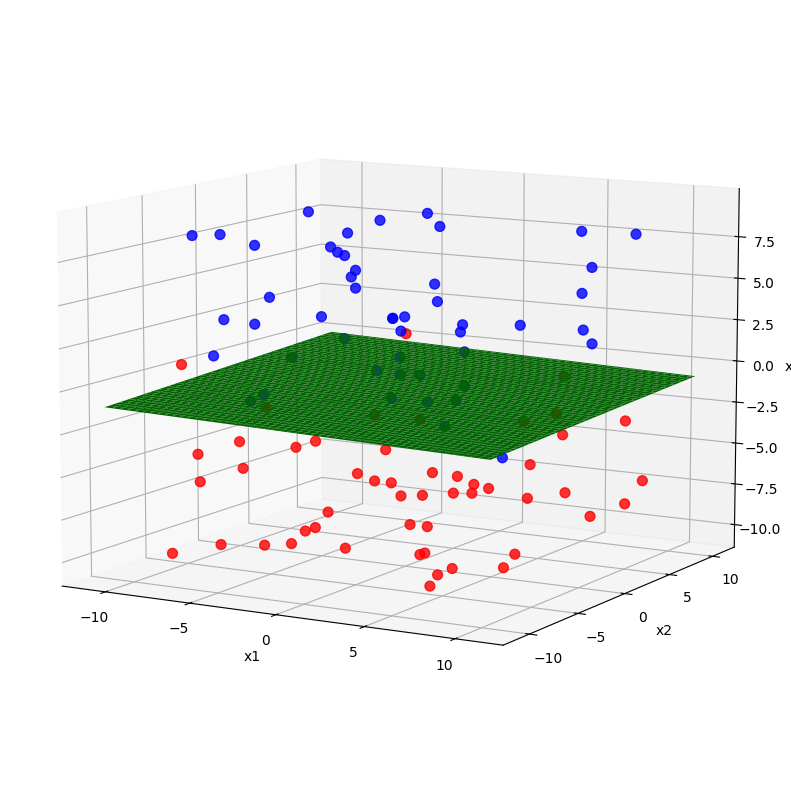

In [7]:
show_3d(X, model.w, title='Hyperplane')

In [8]:
loss_history = model.loss_history

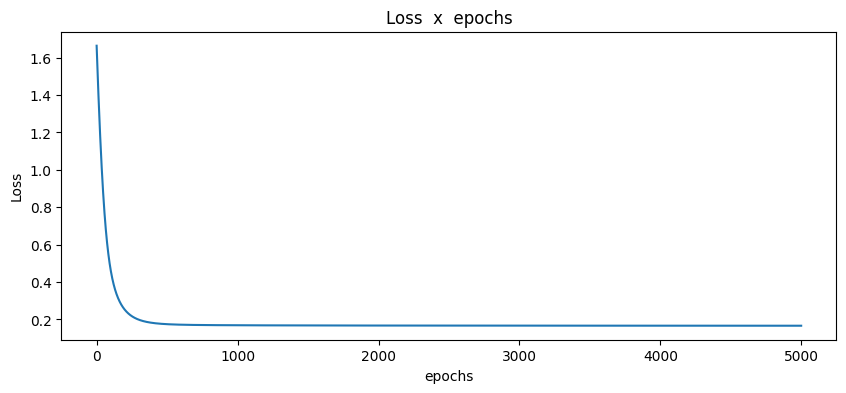

In [9]:
# plot loss
%matplotlib inline
plt.figure(figsize=(10, 4))
plt.plot(loss_history)
plt.title("Loss  x  epochs")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.show()

# Testing

The same as `2D-visualization.ipynb`

## References

 - https://work.caltech.edu/telecourse (lecture 3)
 - Abu-Mostafa, Yaser S., Magdon-Ismail, Malik and Lin, Hsuan-Tien. Learning From Data. : AMLBook, 2012.